# Q2
## part a

### libraries 

In [815]:

import numpy as np 
import cv2 as cv
import matplotlib.pylab as plt 
import math

#### read image

In [816]:
image = cv.imread('images/saffrun.jpg', 0 )

In [817]:
def freq_noise_removing(image): 


    result = image.copy()
    m , n = image.shape
    print(m , n)
    ft = np.fft.fft2(image)
    fs = np.fft.fftshift(ft)
    
    plot_before = 20 * np.log(np.abs(fs))

    width_lines = {(265 , 275) , (455 , 465) , (640 , 650) , (825 , 835) , (1010 , 1020)}
    height_lines = {(102, 112) , (165 , 175) , (222 , 232) , (285 , 295) , (347 , 357) , (400 , 410) , (462 , 472) 
                    , (520 , 530) , (573 , 583) ,(635 , 645) , (695 , 795) , (765 , 775)}


    for hl in width_lines: 
        n1 = hl[0]
        n2 = hl[1]
        for i in range(n1 , n2): 
            for j in range(m):
                check = True
                for l in height_lines: 
                    t1 = l[0] - 20
                    t2 = l[1] + 20
                    if j >= t1 and j <= t2 and ((t1 != 395 and t2 != 415) or (i < 640 or i > 650 )):
                        if ((j < 285 or j >= 500) or ( i < 455 or i >= 835)) :
                    # if( j >= t1 and j <= t2):
                                fs[j , i] = 0
                                check = False 
                if not( ((j < 285 or j >= 500) or ( i < 455 or i >= 835))): 
                  

                    if ( j <= 375 or j >= 440) :
                        fs[j, i] = 0
            


    for hl in height_lines: 
        n1 = hl[0]
        n2 = hl[1]
        for i in range(n): 
            for j in range(n1 , n2):
                check = True

             

                for l in width_lines: 
                    t1 = l[0] - 70
                    t2 = l[1] + 70
                    if i >= t1 and i <= t2 and ((t1 != 640 and t2 != 650) or (j < 395 or j > 415 )):
                        if ((j < 285 or j >= 500) or ( i < 435 or i >= 850)) :
                                check = False 
                                fs[j , i] = 0

                if (not ((j < 285 or j >= 500) or ( i < 435 or i >= 850))): 

                    if ( i <= 620 or i >= 675) and ( i <= 820 or i >= 845) and (i <= 410  or i >= 470 ):
                        fs[j, i] = 0
            
                            
    np.seterr(divide = 'ignore')         
    plot_after= 20 * np.log(np.abs(fs))
    
    #figures
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14, 14) ,
                                    sharex=True, sharey=True)
    ax1.imshow(plot_before , cmap = 'gray')
    ax1.set_title('before denoising')
    ax2.imshow(plot_after ,  cmap = 'gray')
    ax2.set_title('after denoising' )
    plt.tight_layout()
    plt.show()
   
    denoised=np.real(np.fft.ifft2(np.fft.ifftshift(fs)))

    return denoised

815 1290


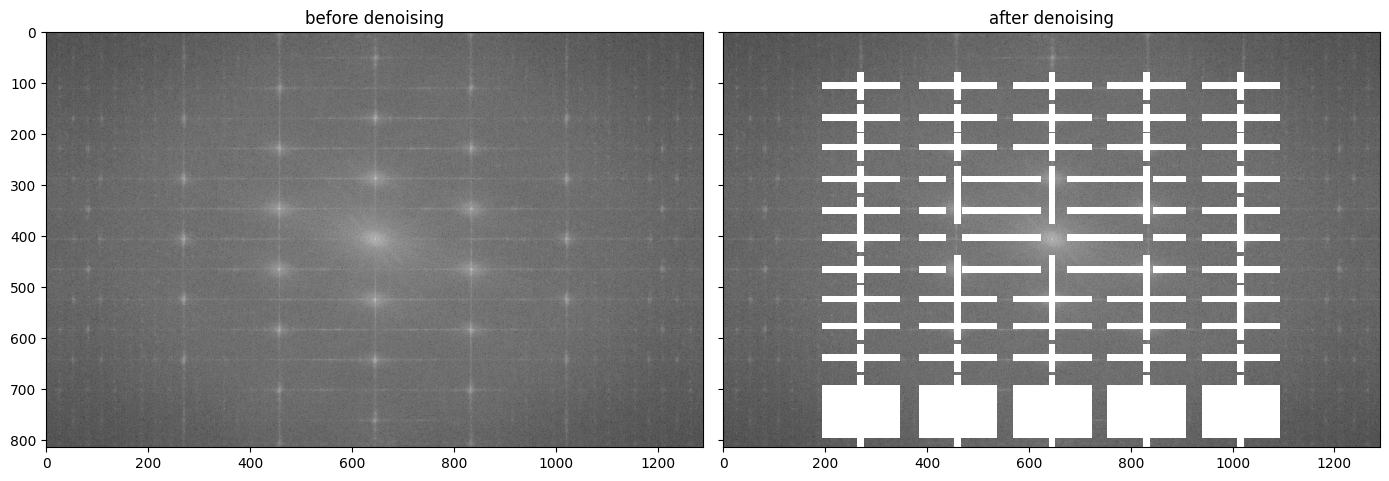

(-0.5, 2579.5, 814.5, -0.5)

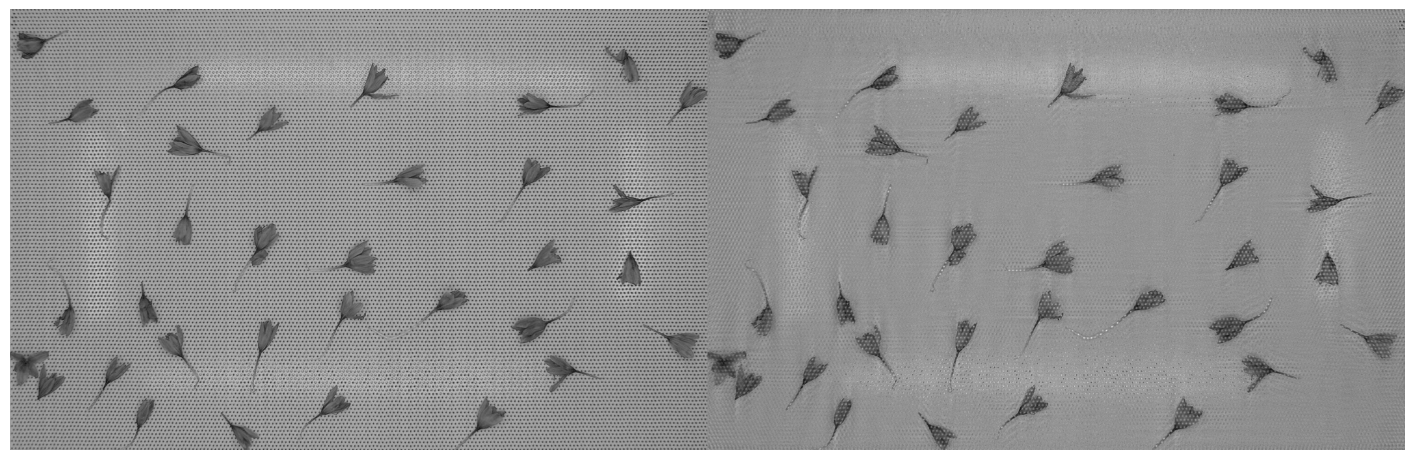

In [818]:
denoised_image = freq_noise_removing(image)
res = np.hstack((image, denoised_image)) #stacking images side-by-side
plt.figure(figsize=(18, 18))
plt.imshow(res , cmap = 'gray')
plt.axis('off')


# part b

(-0.5, 1289.5, 814.5, -0.5)

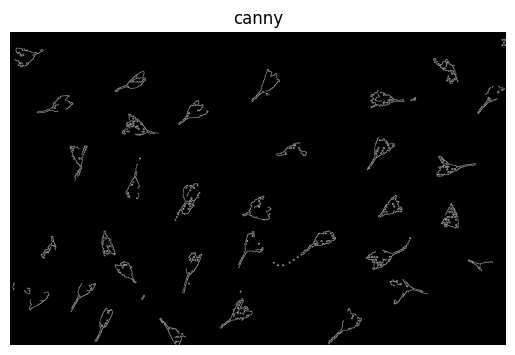

In [819]:
denoised_image = cv.GaussianBlur(denoised_image, (5 ,5), 0) 
pic = np.uint8(denoised_image)
edges = cv.Canny(pic,100,240)
plt.title('canny')
plt.imshow(edges , cmap = 'gray')
plt.axis('off')

# part C

gradiant value [[   0.           90.           90.         ...   90.
    90.            0.        ]
 [ 180.           97.20863686   91.47174657 ...  103.72966104
   101.91598423  180.        ]
 [ 180.          111.01265972  113.39183999 ...  103.38872056
   115.4189438   180.        ]
 ...
 [   0.          -18.33976865  -38.1704262  ...  174.77105245
  -170.90375844  180.        ]
 [   0.           17.43039839  -36.78234575 ...  145.72701812
   165.96911186  180.        ]
 [   0.           90.          -90.         ...   90.
    90.            0.        ]]


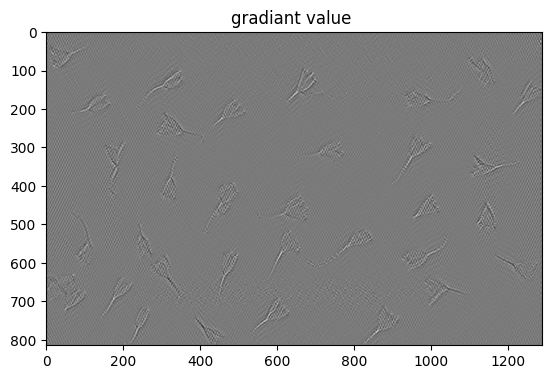

In [826]:
sx = cv.Sobel(src=denoised_image, ddepth=-1, dx=1, dy=0, ksize=3) 
sy = cv.Sobel(src=denoised_image, ddepth= -1, dx=0, dy=1, ksize=3) 
sxy = cv.Sobel(src= denoised_image, ddepth= -1, dx=1, dy=1, ksize=7)
plt.imshow(sxy ,  cmap = 'gray')
plt.title('gradiant value ')
gr_value = np.arctan2(sx , sy) *180 /np.pi
print('gradiant value' , gr_value)

# Q5

# part a 
## countoring 
## 

### read image

In [821]:
image = cv.imread('images/Q7.png' )

In [822]:
def find_contour(img): 
    contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours
    

In [823]:
def canny_edge(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
    return cv.Canny(gray, 100, 150)
   
    


In [824]:
def shape_founder (image):
    im = canny_edge(image)
    plt.imshow(image)

    #contourng 
    final = {}
    contour =find_contour(im)
    shapes = [] 
    m = 0
    n = 0
    for c in contour:
        
        perimeter =  cv.arcLength(c, True)
        #
        
        M = cv.moments(c)
        if M['m00'] != 0.0:
            m = int(M['m10']/M['m00'])
            n = int(M['m01']/M['m00'])



        approx = cv.approxPolyDP(c,  0.01 * perimeter, True)
        
        if len(approx) == 3:
            if 'triangle' not in final:
                final['triangle'] = (approx , (m,n))


        elif len(approx) == 4:
            x, y, w, h = cv.boundingRect(c)
            r = w/h 
            
            if r>= 0.95 and r < 1.05:
                if 'square' not in final:
                    final['square'] = (approx , (m,n))
            else: 
                if 'square' not in final:
                    final['rectangle'] = (approx , (m,n))
        
        else:
            final['circle'] = (approx , (m,n))
        
    return final
   

(-0.5, 245.5, 204.5, -0.5)

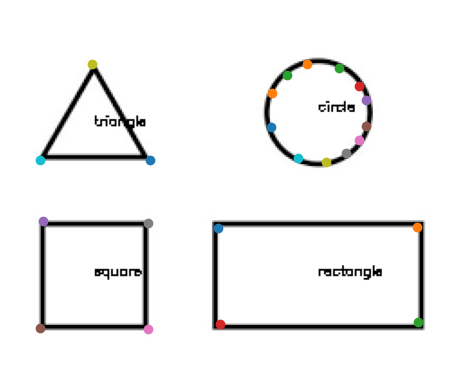

In [825]:
edges = shape_founder(image)


for e in edges.values(): 
    for p in e[0]:
        plt.scatter([x for x, y in p], [y for x, y in p])

for shape in edges : 
    center_point = edges[shape][1]
    cv.putText(image, shape, center_point,
                    cv.FONT_HERSHEY_SIMPLEX, 0.25, (0, 0, 0), 1)
    
plt.imshow(image)
plt.axis("off")
    